<a href="https://colab.research.google.com/github/adeyemi-dev/datascience_proj/blob/main/Model_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning algorithm comparison on heart disease data



Importing libraries


In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [6]:
dataset = pd.read_csv('heart.csv')

In [7]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [11]:
dataset.shape

(1025, 14)

Getting the X and Y variables from our dataset

In [8]:
X = dataset.drop(columns='target',axis=1)
Y= dataset['target']
scaler = StandardScaler()
scaler.fit(X_train)

Dateset Splitting

In [5]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


scaling the data

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Examine the Data Dimenssion

In [19]:
X_train_scaled.shape, Y_train.shape

((820, 13), (820,))

In [20]:
X_test_scaled.shape, Y_test.shape

((205, 13), (205,))

Build Classification model

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

Defining the learning Classfifer

In [14]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

#Build Model, Apply Model on Test Data & Record Accuracy Scores

In [21]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_scaled , Y_train)
    score = clf.score(X_test_scaled , Y_test)
    scores.append(score)

In [22]:
scores


[0.9512195121951219,
 0.8439024390243902,
 0.8341463414634146,
 1.0,
 1.0,
 1.0,
 0.9317073170731708,
 1.0,
 0.9170731707317074,
 0.9219512195121952,
 0.9219512195121952,
 0.8390243902439024,
 0.8390243902439024,
 0.8536585365853658]

#Create data frame of model performance

In [23]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.951220
1,Linear_SVM,0.843902
2,Polynomial_SVM,0.834146
3,RBF_SVM,1.000000
4,Gaussian_Process,1.000000
5,Gradient_Boosting,1.000000
6,Decision_Tree,0.931707
7,Extra_Trees,1.000000
8,Random_Forest,0.917073
9,Neural_Net,0.921951


# Bar plot of model performance

In [26]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.951220
1,Linear_SVM,0.843902
2,Polynomial_SVM,0.834146
3,RBF_SVM,1.000000
4,Gaussian_Process,1.000000
5,Gradient_Boosting,1.000000
6,Decision_Tree,0.931707
7,Extra_Trees,1.000000
8,Random_Forest,0.917073
9,Neural_Net,0.921951


# Bar plot of model performance


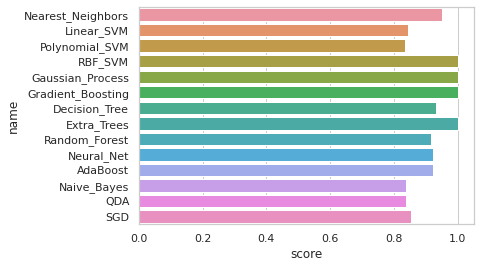

In [27]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)